# Data Manipulation

## Introduction 


This lecture is the second part of our lecture on data manipulation. In this part, we introduce a variety of more advanced data manipulation techniques. 

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# read 'vehicles/vehicles.csv' as data
data = pd.read_csv('vehicles/vehicles.csv')
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


## Binning Numerical Values



When preparing data in order to analyze it, one of the things that is useful to do is to **create additional categorical variables**. 



Categorical variables allow you to group records in different ways, and each way that you categorize them can provide you with a different perspective when you're conducting your analysis. 

A common way of creating additional categorical fields is to **bin** numeric variables in a column based on how relatively high or low they are.



For example, our data set has a 'Fuel Barrels/Year' variable that tells us how many fuel barrels per year our car uses.


However, it isn't easy to tell whether a vehicle has low or high fuel efficiency just by looking at the numbers. To help with this, we can bin the values in the 'Fuel Barrels/Year' field into an intuitive number of categories.

For this column, let's choose 4 bins so that we have four "buckets": 

- low;
- medium low;
- medium high;
- high. 

In [ ]:
fuel = data['Fuel Barrels/Year']
fuel

0        19.388824
1        25.354615
2        20.600625
3        25.354615
4        20.600625
           ...    
35947     9.155833
35948     9.155833
35949     9.155833
35950     9.155833
35951     9.417429
Name: Fuel Barrels/Year, Length: 35952, dtype: float64

Before binning the data, let us first examine the distribution of our data using a histogram. 

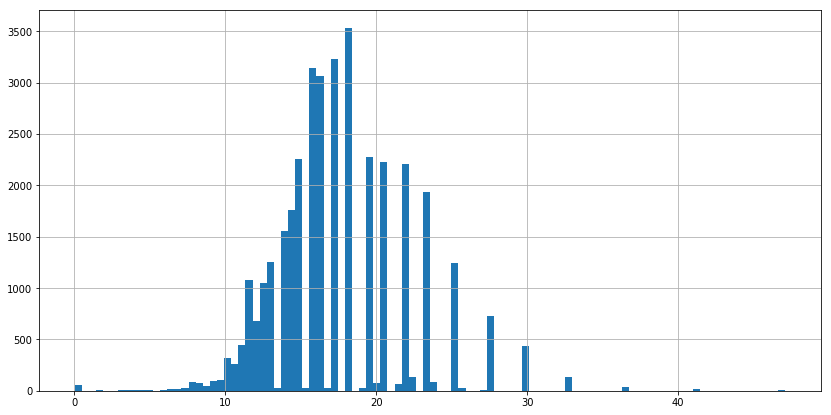

In [ ]:
plt.figure(figsize=(14,7))
fuel.hist(bins=100)  

Now that we've examined this variable, let us make the bins. We can create the bins using the pd.cut method. 

In [ ]:
pd.cut(fuel, 4).value_counts() 

(11.817, 23.574]    30566
(23.574, 35.33]      2665
(0.013, 11.817]      2659
(35.33, 47.087]        62
Name: Fuel Barrels/Year, dtype: int64

In [ ]:
mid_point = ((fuel.min() + fuel.max()) / 2) 
mid_point 

23.573571428571427

In [ ]:
mid_point / 2

11.786785714285713

Let us know look at what our histogram looks like with these 4 bins.  

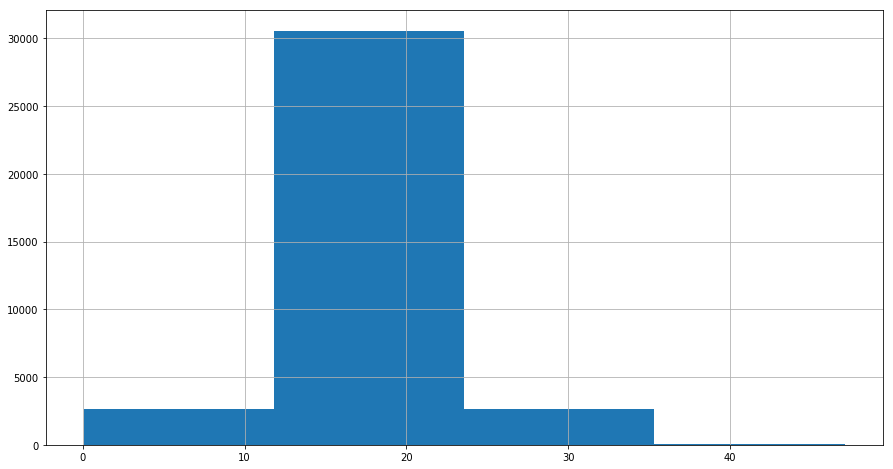

In [ ]:
plt.figure(figsize=(15,8))
fuel.hist(bins=4) 

Instead of cut, which bins based on the intermediate values in a particular value range, we can also use the qcut method which cuts the data based on the **quantiles**. If you want baskets (i.e. bins) that are roughly equally sized, you can use the qcut method. 

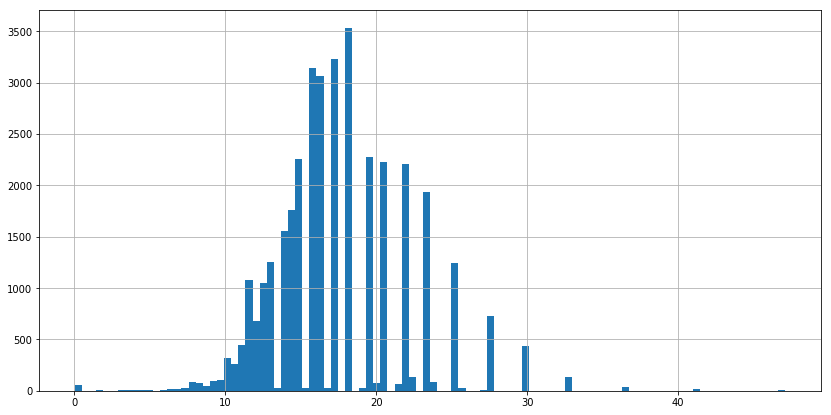

In [ ]:
plt.figure(figsize=(14,7))
fuel.hist(bins=100)  

In [ ]:
print(pd.qcut(fuel, q = 4).value_counts())
print(pd.cut(fuel, 4).value_counts())

(14.699, 17.348]    11675
(0.059, 14.699]      9027
(17.348, 20.601]     8170
(20.601, 47.087]     7080
Name: Fuel Barrels/Year, dtype: int64
(11.817, 23.574]    30566
(23.574, 35.33]      2665
(0.013, 11.817]      2659
(35.33, 47.087]        62
Name: Fuel Barrels/Year, dtype: int64


In [ ]:
# 50% of data on one side and 50% of the data on the other side
fuel.median() 

17.347894736842107

In Python, we can also create a list of labels that will be assigned to our bins.

In [ ]:
mpg_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']



Next, we must determine how we want our data to be binned. As we talked about, there are three main approaches that we can choose from:

- Equal width bins (cut): the range for each bin is the same size.
- Equal frequency bins (qcut): approximately the same number of records in each bin.
- Custom-sized bins: the user explicitly defines where they want the cutoff for each bin to be.

As discussed before you want **equal width bins**, you can use the *cut* method in Pandas and pass it the column you want to bin, the number of bins and the list of labels.

In [ ]:
data['Combined MPG']

0        17
1        13
2        16
3        13
4        16
         ..
35947    36
35948    36
35949    36
35950    36
35951    35
Name: Combined MPG, Length: 35952, dtype: int64

In [ ]:
# bin using cut with the labels above on data['Combined MPG']
binned = pd.cut(data['Combined MPG'], 5, labels = mpg_labels)
binned.head(10)

0         Low
1    Very Low
2    Very Low
3    Very Low
4    Very Low
5         Low
6         Low
7         Low
8         Low
9         Low
Name: Combined MPG, dtype: category
Categories (5, object): [Very Low < Low < Moderate < High < Very High]

In this example, if you want **equal frequency bins**, you would use the *qcut* (quantile cut, Quantile-based discretization function) method instead.

In [ ]:
# bin using qcut with the labels above 
binned = pd.qcut(data['Combined MPG'], 5, labels = mpg_labels)
binned 

0              Low
1         Very Low
2         Very Low
3         Very Low
4         Very Low
           ...    
35947    Very High
35948    Very High
35949    Very High
35950    Very High
35951    Very High
Name: Combined MPG, Length: 35952, dtype: category
Categories (5, object): [Very Low < Low < Moderate < High < Very High]

Finally, if you want custom bin sizes, you can pass a list of bin range values to the cut method instead of the number of bins, and it will bin the values for you accordingly.

In [ ]:
# make cut with specified cutoff values (note that here we will need to include lower bounds and uppers bounds)
cutoffs = [7,17,21,23,30,47]
binned = pd.cut(data['Combined MPG'], cutoffs, labels = mpg_labels)
binned

0         Very Low
1         Very Low
2         Very Low
3         Very Low
4         Very Low
           ...    
35947    Very High
35948    Very High
35949    Very High
35950    Very High
35951    Very High
Name: Combined MPG, Length: 35952, dtype: category
Categories (5, object): [Very Low < Low < Moderate < High < Very High]

## Conditional Categories 



Another way to create intuitive additional categories in your data is to create columns based on conditional statements. Earlier in this lesson, we filtered our data based on conditional statements. Here, we will populate the values in a column using the loc method.


Our vehicles data set currently has 45 different values in the Transmission field, but one of the key pieces of information *embedded* in there is whether a vehicle has an automatic or manual transmission. 

In [ ]:
data["Transmission"].value_counts() 

Automatic 4-spd                     10585
Manual 5-spd                         7787
Automatic (S6)                       2631
Automatic 3-spd                      2597
Manual 6-spd                         2423
Automatic 5-spd                      2171
Automatic 6-spd                      1432
Manual 4-spd                         1306
Automatic (S8)                        960
Automatic (S5)                        822
Automatic (variable gear ratios)      675
Automatic 7-spd                       662
Automatic (S7)                        261
Auto(AM-S7)                           256
Automatic 8-spd                       243
Automatic (S4)                        229
Auto(AM7)                             157
Auto(AV-S6)                           145
Auto(AM6)                             110
Auto(AM-S6)                            92
Automatic 9-spd                        90
Manual 3-spd                           74
Manual 7-spd                           68
Auto(AV-S7)                       

It would therefore be valuable to extract that so that we could group vehicles by their transmission type. Let's look at how we can create a new TransType column that only contains one of two values for each vehicle: Automatic or Manual.

In [ ]:
# use.loc to select all instances whose transmission start with 'A' and those starting with 'M'. 
# assign 'Automatic' and 'Manual' to those, repectivly.

data.loc[data['Transmission'].str.startswith('A'), 'TransType'] = 'Automatic'
data.loc[data['Transmission'].str.startswith('M'), 'TransType'] = 'Manual'

#data['TransType'].value_counts()
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,TransType
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,Automatic
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,Automatic
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100,Automatic
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,Automatic
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550,Automatic


We were able to leverage the str.startswith method in our conditional statements such that whenever the value in the Transmission field started with an A, we would assign a TransType of Automatic, and when the value started with M, we would assign a TransType of Manual.

## One-hot-Encoding Variables



One-hot encoding is a technique used to expand a single categorical column into as many columns as there are categories. 

Each column contains a **1 if that record belongs to the category** and a **0 if it does not**. This is useful for performing analyses where you want to know whether something falls into a specific category or not. 


It will also be useful when you learn about machine learning, as one-hot encoding makes it easier for some algorithms to interpret and find patterns in categorical data.

To perform one-hot encoding on a column, you can use the Pandas get_dummies method and pass it the column you would like to one-hot encode.

In [ ]:
data['Fuel Type'] #.value_counts()

0        Regular
1        Regular
2        Regular
3        Regular
4        Premium
          ...   
35947    Premium
35948    Premium
35949    Premium
35950    Premium
35951    Premium
Name: Fuel Type, Length: 35952, dtype: object

In [ ]:
# get dummies of the fuel type
fuel_type = pd.get_dummies(data['Fuel Type'])
fuel_type

,CNG,Diesel,Gasoline or E85,Gasoline or natural gas,Gasoline or propane,Midgrade,Premium,Premium Gas or Electricity,Premium and Electricity,Premium or E85,Regular,Regular Gas and Electricity,Regular Gas or Electricity
0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,0,0,0,0,0,0,1,0,0,0,0,0,0
35948,0,0,0,0,0,0,1,0,0,0,0,0,0
35949,0,0,0,0,0,0,1,0,0,0,0,0,0
35950,0,0,0,0,0,0,1,0,0,0,0,0,0


## Combining Data Frames



Another useful thing to do with data sets is to combine them. Pandas provides us with a few different ways to do this. The first way is by merging. Merging is similar to creating a join in SQL, where you can specify common fields between the two tables and then include information from both in your query. Pandas has a merge method that functions in a similar way.



To illustrate, let's read in a data frame that has the average Combined MPG for each Make. We will merge that average into our data frame, joining on Make, so that we can see how fuel efficient a vehicle is in comparison to the other vehicles made by the same manufacturer.

In [ ]:
avg_mpg = pd.read_csv('average_mpg.csv')
avg_mpg   

,Make,0
0,AM General,15.000000
1,ASC Incorporated,17.500000
2,Acura,22.415563
3,Alfa Romeo,20.500000
4,American Motors Corporation,18.113636
...,...,...
122,Volkswagen,25.106017
123,Volvo,21.523013
124,Wallace Environmental,14.218750
125,Yugo,25.625000


In [ ]:
# merge data and avg_mpg on 'Make'
data.merge(avg_mpg, on = 'Make') # OR reversed avg_mpg.merge(data, on = 'Make')

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,TransType,0
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,Automatic,15.0
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,Automatic,15.0
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100,Automatic,15.0
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,Automatic,15.0
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550,Automatic,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Automatic,Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100,Automatic,36.3
35948,smart,fortwo coupe,2014,1.0,3.0,Automatic,Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100,Automatic,36.3
35949,smart,fortwo coupe,2015,1.0,3.0,Automatic,Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100,Automatic,36.3
35950,smart,fortwo coupe,2016,0.9,3.0,Automatic,Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100,Automatic,36.3


Another method that Pandas provides for combining data sets is concatenation. The pandas concat method lets you attach columns or rows from one data set onto another data set as long as both data sets have the same number of rows (if you are concatenating columns) or columns (if you are concatenating rows). Let's take a look at examples for each of these.



For column concatenation, we can use the one-hot encoded drivetrain data frame we created earlier and add those columns to our vehicles data set. Note that the data frames passed to the concat method must be in a list and you set the axis parameter to 1 in order to indicate that you are concatenating columns.

In [ ]:
# split data frame 
other = data[['Make', 'Year', 'Model']]

In [ ]:
fuel_type.head()

,CNG,Diesel,Gasoline or E85,Gasoline or natural gas,Gasoline or propane,Midgrade,Premium,Premium Gas or Electricity,Premium and Electricity,Premium or E85,Regular,Regular Gas and Electricity,Regular Gas or Electricity
0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
other.head()

,Make,Year,Model
0,AM General,1984,DJ Po Vehicle 2WD
1,AM General,1984,FJ8c Post Office
2,AM General,1985,Post Office DJ5 2WD
3,AM General,1985,Post Office DJ8 2WD
4,ASC Incorporated,1987,GNX


In [ ]:
# concatenate here along axis=1
pd.concat([other, fuel_type], axis= 1)

,Make,Year,Model,CNG,Diesel,Gasoline or E85,Gasoline or natural gas,Gasoline or propane,Midgrade,Premium,Premium Gas or Electricity,Premium and Electricity,Premium or E85,Regular,Regular Gas and Electricity,Regular Gas or Electricity
0,AM General,1984,DJ Po Vehicle 2WD,0,0,0,0,0,0,0,0,0,0,1,0,0
1,AM General,1984,FJ8c Post Office,0,0,0,0,0,0,0,0,0,0,1,0,0
2,AM General,1985,Post Office DJ5 2WD,0,0,0,0,0,0,0,0,0,0,1,0,0
3,AM General,1985,Post Office DJ8 2WD,0,0,0,0,0,0,0,0,0,0,1,0,0
4,ASC Incorporated,1987,GNX,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,2013,fortwo coupe,0,0,0,0,0,0,1,0,0,0,0,0,0
35948,smart,2014,fortwo coupe,0,0,0,0,0,0,1,0,0,0,0,0,0
35949,smart,2015,fortwo coupe,0,0,0,0,0,0,1,0,0,0,0,0,0
35950,smart,2016,fortwo coupe,0,0,0,0,0,0,1,0,0,0,0,0,0


To illustrate row concatenation, let's create two new data frames based on conditional filters from our original data frame - one containing only Lexus vehicles and another containing only Audi vehicles. We will then combine them using the concat method into a lexus_audi data frame that contains only vehicles manufactured by those two companies.

In [ ]:
# split df into lexus and audi 
lexus = data[data['Make']=='Lexus']
audi = data[data['Make']=='Audi']

# concatenate along the row axis (i.e. axis=0) here (i.e. simply 'append it')
pd.concat([lexus, audi], axis = 0)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,TransType
21128,Lexus,CT 200h,2011,1.8,4.0,Automatic,Front-Wheel Drive,Compact Cars,Regular,7.847857,43,40,42,211.595238,800,Automatic
21129,Lexus,CT 200h,2012,1.8,4.0,Automatic,Front-Wheel Drive,Compact Cars,Regular,7.847857,43,40,42,211.595238,800,Automatic
21130,Lexus,CT 200h,2013,1.8,4.0,Automatic,Front-Wheel Drive,Compact Cars,Regular,7.847857,43,40,42,211.000000,800,Automatic
21131,Lexus,CT 200h,2014,1.8,4.0,Automatic,Front-Wheel Drive,Compact Cars,Regular,7.847857,43,40,42,179.000000,800,Automatic
21132,Lexus,CT 200h,2015,1.8,4.0,Automatic,Front-Wheel Drive,Compact Cars,Regular,7.847857,43,40,42,211.000000,800,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,Audi,allroad quattro,2013,2.0,4.0,Automatic,All-Wheel Drive,Small Station Wagons,Premium,14.330870,20,27,23,394.000000,1750,Automatic
1389,Audi,allroad quattro,2013,2.0,4.0,Automatic,All-Wheel Drive,Small Station Wagons,Premium or E85,14.330870,20,27,23,394.000000,1750,Automatic
1390,Audi,allroad quattro,2014,2.0,4.0,Automatic,All-Wheel Drive,Small Station Wagons,Premium or E85,14.330870,20,27,23,394.000000,1750,Automatic
1391,Audi,allroad quattro,2015,2.0,4.0,Automatic,All-Wheel Drive,Small Station Wagons,Premium or E85,13.733750,21,28,24,373.000000,1700,Automatic


## Melting Data into Long Format



Our vehicles data set currently has a **wide format**, where there is a column for each attribute.  

However, some analytic and visualization (e.g. time series visualization) tasks will require that the data be in a **long format**, where there are a few variables that define the entities and then all other attribute information is **condensed** into two columns: 

- one containing the column/attribute names;
- another containing the value for that attribute for each entity. 

Pandas makes it easy to format data this way with the melt function.

In [ ]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6},
                   'D': {0: 2, 1: 4, 2: 6}})
df

In [ ]:
pd.melt(df, id_vars=['A'], value_vars=['B', 'C', 'D'])

In [ ]:
melted_df = pd.melt(data, id_vars=['Model'], value_vars=['Fuel Type', 'City MPG']) 
melted_df

In [ ]:
melted_df.iloc[[0,1,2]]

In [ ]:
melted_df.iloc[[35952, 35953, 35954]] 

Now suppose we were going to perform some analysis or visualization task where we needed the Year, Make, and Model to identify the vehicles and then we also needed the City MPG, Highway MPG, and Combined MPG fields for performing various calculations. Below is how we would melt the data into the proper format.

In [ ]:
# melt on data with id_vars=['Year','Make','Model'] and value_vars=['Highway MPG','Combined MPG']
pd.melt(data, id_vars=['Year','Make','Model'], value_vars=['Highway MPG','Combined MPG', 'Transmission', 'Cylinders'])

As you can see, the column names have been stacked into the the variable field and their corresponding values have been stacked into the value field.

## Summary 


In this lesson, we learned some more advanced ways of manipulating data frames. We then learned how to filter records based on conditional logic and how to add create additional categorical columns that may be useful to us when analyzing and modeling data later. From there, we learned how to combine data from multiple data sets and also how to melt data to make it easier to compute upon.

In [ ]:
average = (data['City MPG'] + data['Highway MPG']) / 2
average = pd.DataFrame(average)
average['Make'] = data['Make']
average
average = average.groupby(["Make"]).mean()
average.to_csv('average_mpg.csv', index = True)